In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv('data/adhd-beliefs-pt.csv')

In [3]:
df.head()

,sex,adhd_diagnosis,age,education,occupation,dialect,forgetting_objects,forgetting_responsabilities,emotion_management,emotion_reactions,...,need_fast_talk_interest,need_fast_talk_information,speaking_before_thinking,something_to_add,something_to_add_timid,something_to_add_impuslive,special_interest,diary_entry,selfdefining_memory,empty_sheet
0,Masculino,Não tenho,21,Licenciatura,Estudante,Português de Portugal,2,3,2,3,...,2,1,1,3,4,2,NaN,NaN,NaN,NaN
1,Feminino,Não tenho,22,Licenciatura,Estudante,Português de Portugal,3,3,4,4,...,1,1,3,4,4,2,"Adoro cozinhar, porque sinto que é a forma ide...","Hoje foi um dia bastante normal, como ontem fi...","Quando era mais nova, eu tinha uma professora ...",Recentemente tenho pensado muito no impacto qu...
2,Feminino,Não tenho,53,Licenciatura,Trabalhador,Português de Portugal,3,4,4,3,...,1,1,3,3,1,2,NaN,NaN,NaN,NaN
3,Feminino,Não tenho,23,Mestrado,Trabalhador-estudante,Português de Portugal,2,1,4,4,...,1,1,4,4,4,2,Gosto de ver séries porque relatam relações sa...,Os eventos que considero mais relevantes serão...,Não tenho,Este questionário foi um pouco extenso. Meu au...
4,Feminino,Não tenho,20,Licenciatura,Estudante,Português de Portugal,4,2,2,3,...,2,2,4,3,4,3,NaN,NaN,NaN,NaN


/tmp/ipykernel_19247/3290122467.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='rocket')


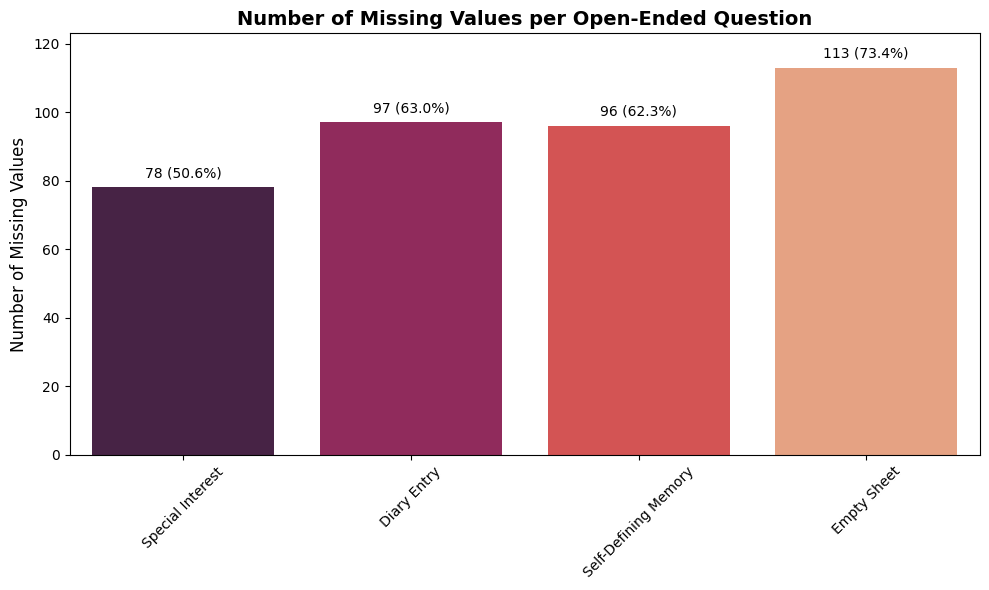

In [4]:
# Calculate the count of missing values for the selected columns
missing_counts = df[['special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']].isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100

# Mapping variable names to descriptive text
variable_descriptions = {
    'special_interest': 'Special Interest',
    'diary_entry': 'Diary Entry',
    'selfdefining_memory': 'Self-Defining Memory',
    'empty_sheet': 'Empty Sheet'
}

# Replace variable names with descriptive text
missing_counts.index = missing_counts.index.map(variable_descriptions)
missing_percentage.index = missing_percentage.index.map(variable_descriptions)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='rocket')

# Add value and percentage annotations on top of the bars
for i, (value, percentage) in enumerate(zip(missing_counts.values, missing_percentage.values)):
    ax.text(i, value + 2, f'{value} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, color='black')

# Adjust the y-axis limit
ax.set_ylim(0, missing_counts.max() + 10)

# Add meaningful labels and title
plt.title('Number of Missing Values per Open-Ended Question', fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.savefig('data/missing_values.png', dpi=300, bbox_inches='tight')
plt.show()


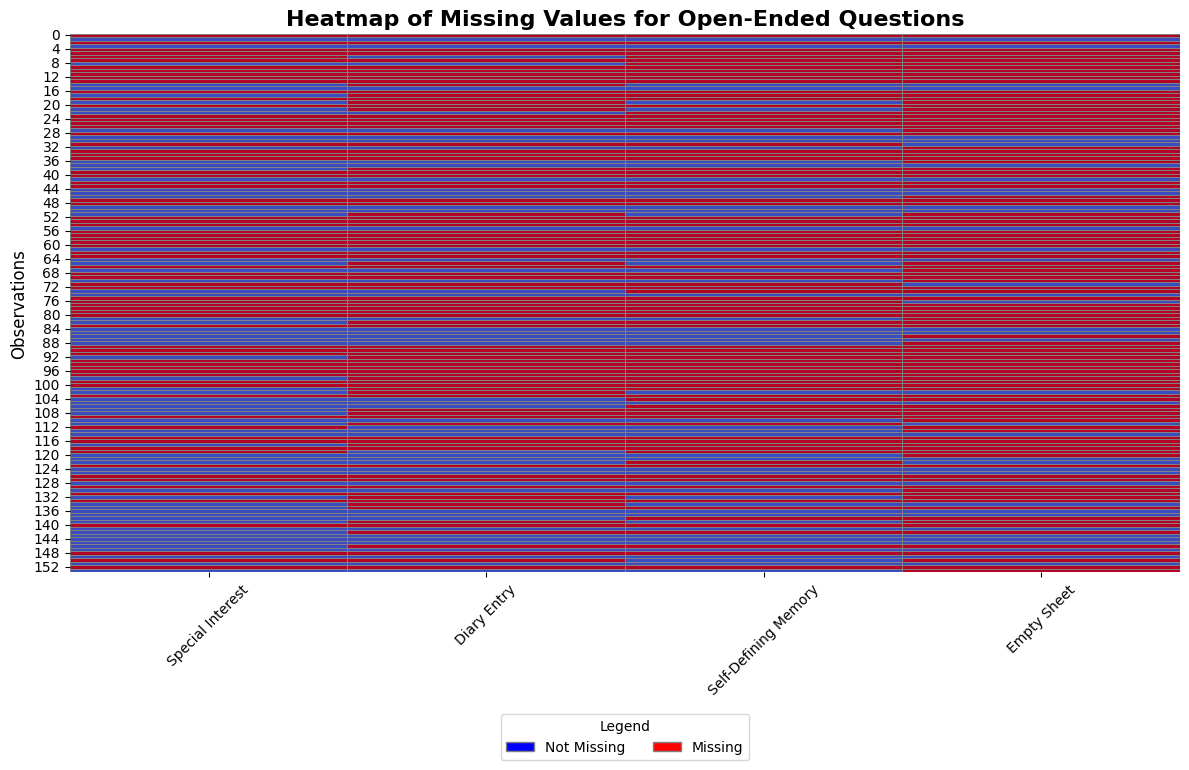

In [5]:
from matplotlib.patches import Patch

# Create a heatmap of missing values with improved aesthetics
plt.figure(figsize=(12, 8))
sns.heatmap(
    df[['special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']].isnull(),
    cmap='coolwarm',
    cbar=False,
    linewidths=0.5,
    linecolor='gray'
)

# Add descriptive labels and title
plt.title('Heatmap of Missing Values for Open-Ended Questions', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('Observations', fontsize=12)

# Replace variable names with descriptive text
descriptive_labels = [variable_descriptions.get(col, col) for col in ['special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']]
plt.xticks(ticks=[x + 0.5 for x in range(len(descriptive_labels))], labels=descriptive_labels, rotation=45, fontsize=10, ha='center')

legend_elements = [
    Patch(facecolor='blue', edgecolor='gray', label='Not Missing'),
    Patch(facecolor='red', edgecolor='gray', label='Missing')
]
plt.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    title='Legend',
    fontsize=10,
    ncol=2
)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('data/missing_values_heatmap_pretty.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
adhd_counts = df['adhd_diagnosis'].value_counts()
adhd_labels = [f"{label} ({count / adhd_counts.sum() * 100:.1f}%)" for label, count in adhd_counts.items()]

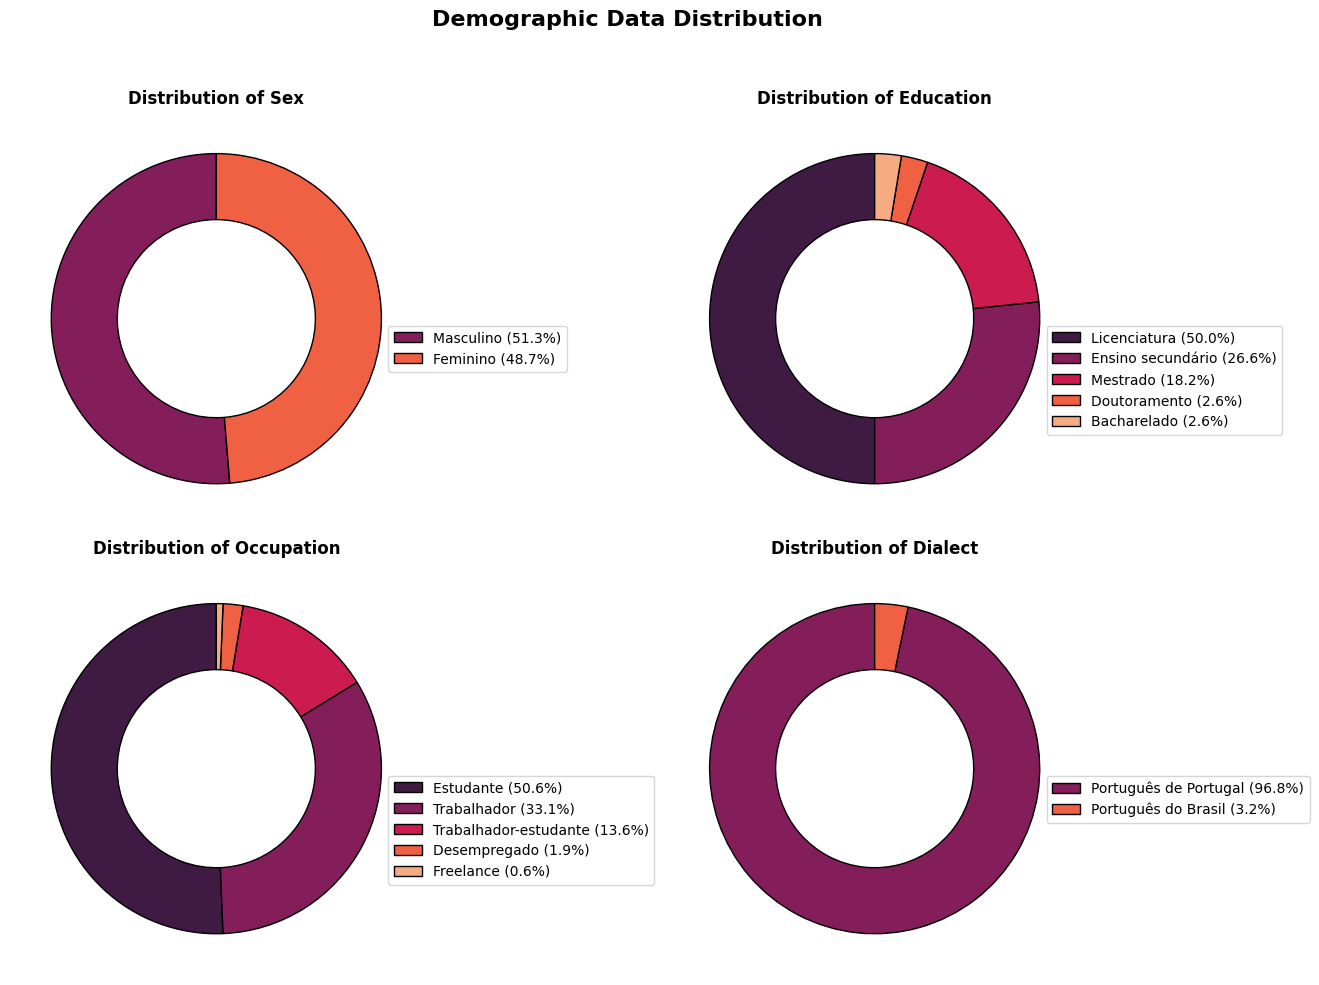

In [7]:
# Define labels for the legends
sex_counts = df['sex'].value_counts()
sex_labels = [f"{label} ({count / sex_counts.sum() * 100:.1f}%)" for label, count in sex_counts.items()]
education_counts = df['education'].value_counts()
education_labels = [f"{label} ({count / education_counts.sum() * 100:.1f}%)" for label, count in education_counts.items()]
occupation_counts = df['occupation'].value_counts()
occupation_labels = [f"{label} ({count / occupation_counts.sum() * 100:.1f}%)" for label, count in occupation_counts.items()]
dialect_counts = df['dialect'].value_counts()
dialect_labels = [f"{label} ({count / dialect_counts.sum() * 100:.1f}%)" for label, count in dialect_counts.items()]

# Create a figure with a uniform grid layout
fig1 = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, figure=fig1)
fig1.suptitle('Demographic Data Distribution', fontsize=16, fontweight='bold')

# Donut chart for distribution of sex
ax1 = fig1.add_subplot(gs[0, 0])
ax1.pie(
    sex_counts,
    startangle=90,
    colors=sns.color_palette('rocket', len(sex_counts)),
    wedgeprops={'edgecolor': 'black', 'width': 0.4},  # Add width for donut effect
)
ax1.set_title('Distribution of Sex', fontsize=12, fontweight='bold')
ax1.legend(labels=sex_labels, loc='upper left', bbox_to_anchor=(0.9, 0.5), fontsize=10)

# Donut chart for distribution of education
ax2 = fig1.add_subplot(gs[0, 1])
ax2.pie(
    education_counts,
    startangle=90,
    colors=sns.color_palette('rocket', len(education_counts)),
    wedgeprops={'edgecolor': 'black', 'width': 0.4},  # Add width for donut effect
)
ax2.set_title('Distribution of Education', fontsize=12, fontweight='bold')
ax2.legend(labels=education_labels, loc='upper left', bbox_to_anchor=(0.9, 0.5), fontsize=10)

# Donut chart for distribution of occupation
ax4 = fig1.add_subplot(gs[1, 0])
ax4.pie(
    occupation_counts,
    startangle=90,
    colors=sns.color_palette('rocket', len(occupation_counts)),
    wedgeprops={'edgecolor': 'black', 'width': 0.4},  # Add width for donut effect
)
ax4.set_title('Distribution of Occupation', fontsize=12, fontweight='bold')
ax4.legend(labels=occupation_labels, loc='upper left', bbox_to_anchor=(0.9, 0.5), fontsize=10)

# Donut chart for distribution of dialect
ax5 = fig1.add_subplot(gs[1, 1])
ax5.pie(
    dialect_counts,
    startangle=90,
    colors=sns.color_palette('rocket', len(dialect_counts)),
    wedgeprops={'edgecolor': 'black', 'width': 0.4},  # Add width for donut effect
)
ax5.set_title('Distribution of Dialect', fontsize=12, fontweight='bold')
ax5.legend(labels=dialect_labels, loc='upper left', bbox_to_anchor=(0.9, 0.5), fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('data/demographic_data_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
for i, count in enumerate(adhd_counts.values):
    print(i, count)

0 96
1 32
2 18
3 8


/tmp/ipykernel_19247/366273223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='adhd_diagnosis', palette='rocket', order=adhd_counts.index)


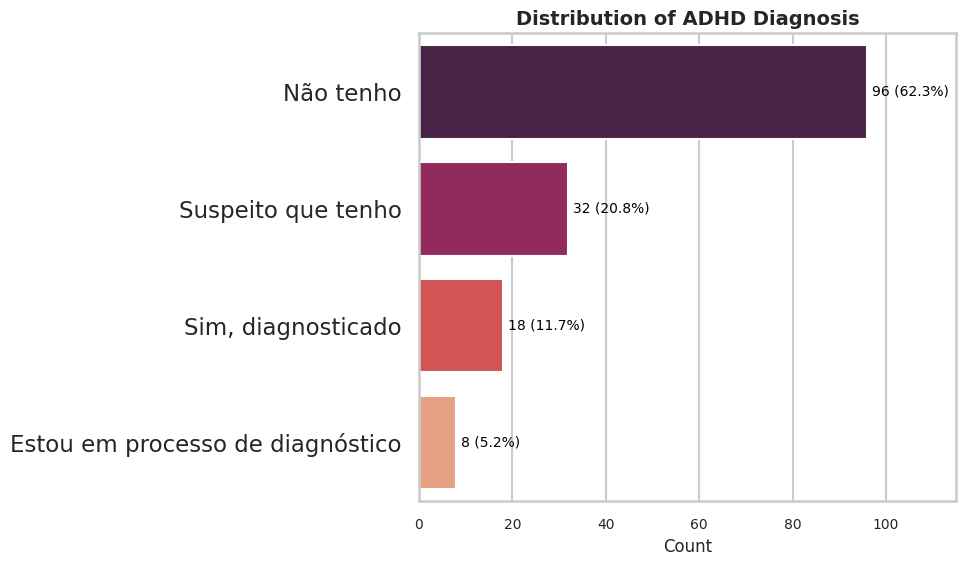

In [33]:
# Make a countplot of the adhd_diagnosis variable with inverted axes
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='adhd_diagnosis', palette='rocket', order=adhd_counts.index)

# Add percentage annotations directly after each bar
for i, category in enumerate(adhd_counts.index):
    count = adhd_counts[category]
    percentage = count / adhd_counts.sum() * 100
    ax.text(count +1, i, f'{count} ({percentage:.1f}%)', va='center', ha='left', fontsize=10, color='black')

# Set x-axis limit
plt.xlim(0, 115)

plt.title('Distribution of ADHD Diagnosis', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.savefig('data/adhd_diagnosis_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

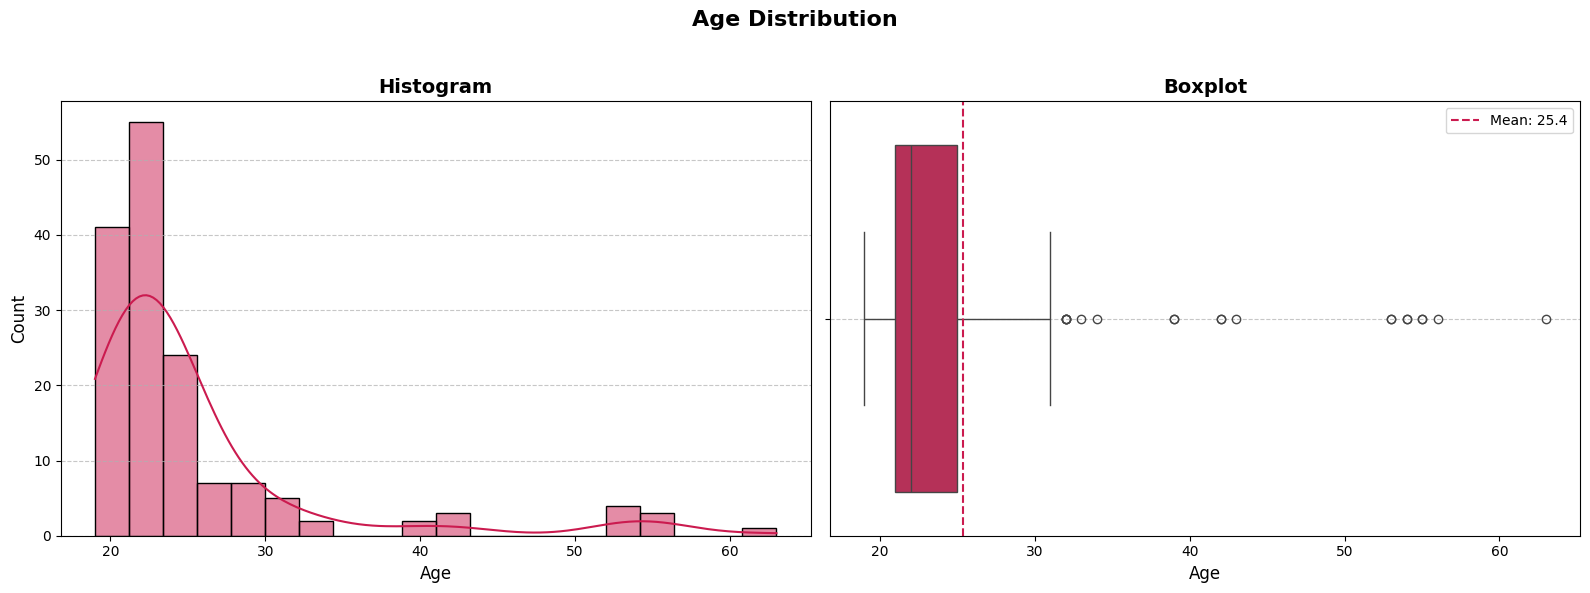

In [9]:
# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Age distribution (Histogram)
sns.histplot(df['age'], bins=20, kde=True, color=sns.color_palette('rocket', 1)[0], ax=axes[0])
axes[0].set_title('Histogram', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Age distribution (Boxplot)
sns.boxplot(x=df['age'], color=sns.color_palette('rocket', 1)[0], ax=axes[1])
mean_age = df['age'].mean()
axes[1].axvline(mean_age, color=sns.color_palette('rocket', 1)[0], linestyle='--', label=f'Mean: {mean_age:.1f}')
axes[1].set_title('Boxplot', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend()

# Add a general title
fig.suptitle('Age Distribution', fontsize=16, fontweight='bold')

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('data/combined_age_adhd_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_19247/1959195405.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(descriptive_labels, fontsize=12)


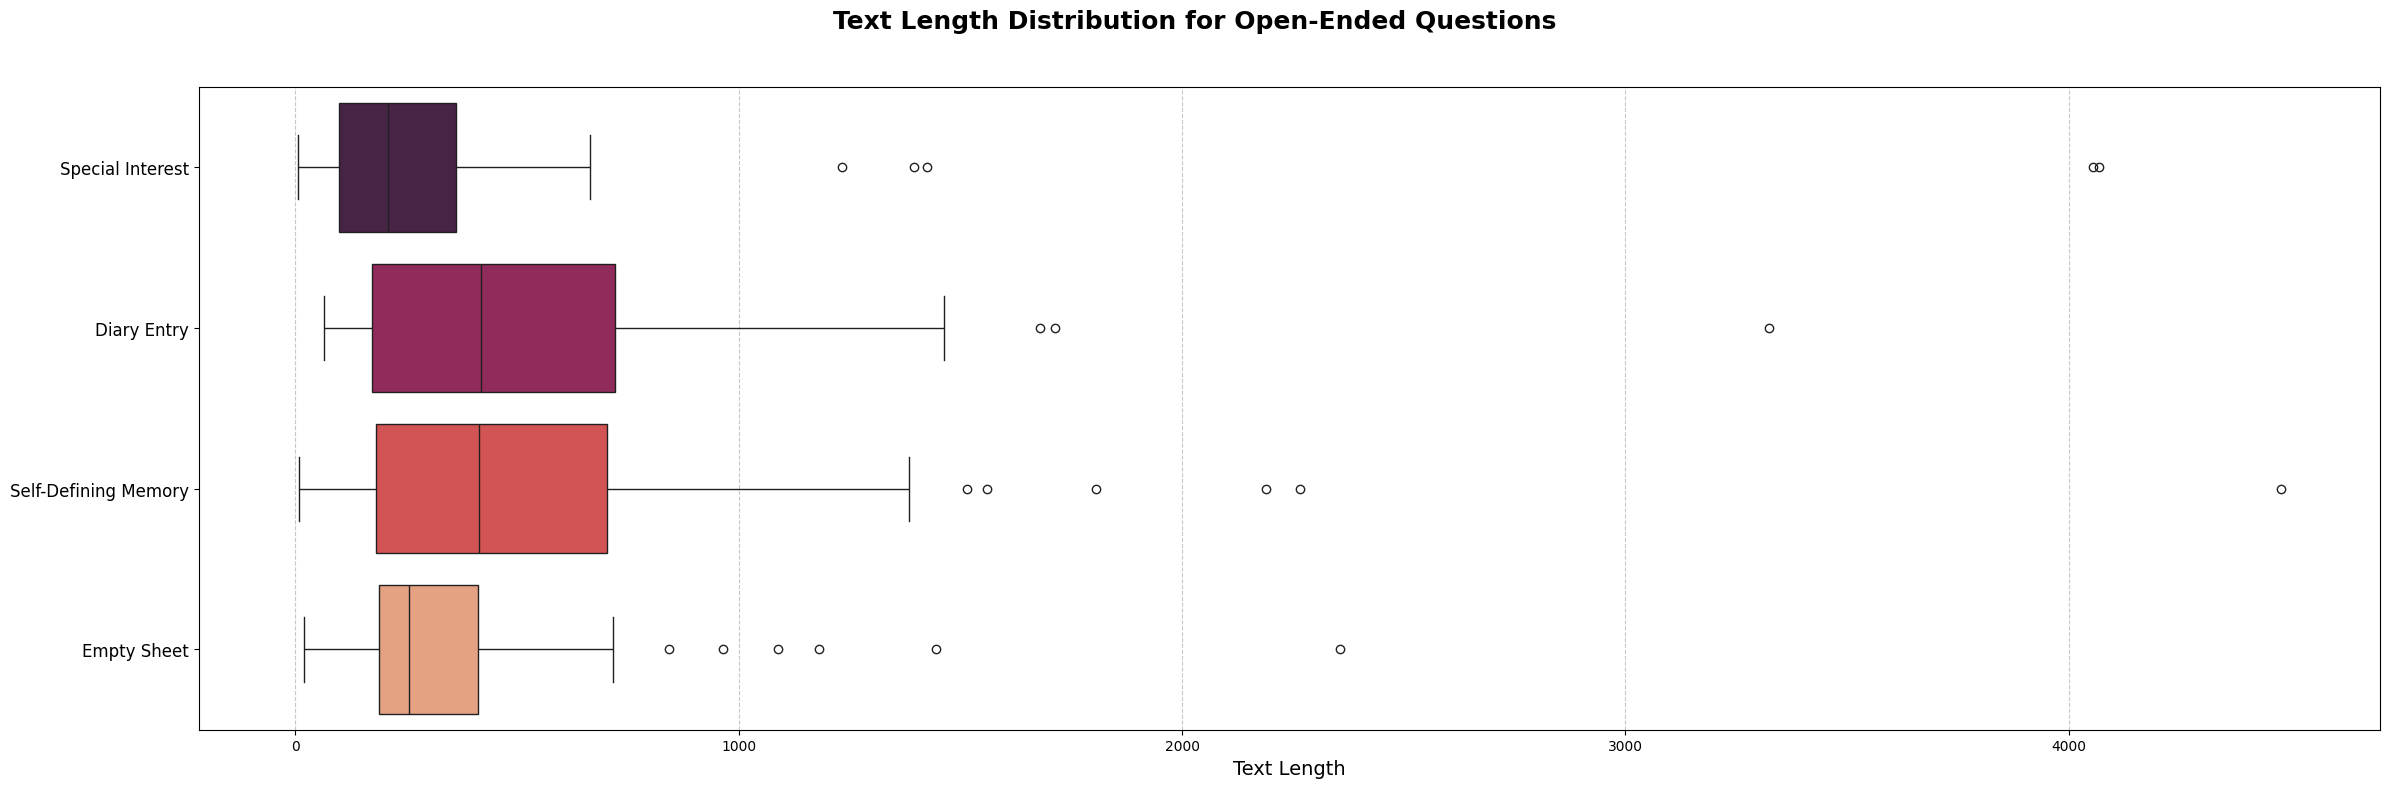

In [10]:
# Create a single figure with one column for all boxplots
fig, ax = plt.subplots(figsize=(24, 8))
fig.suptitle('Text Length Distribution for Open-Ended Questions', fontsize=18, fontweight='bold')

# Combine all boxplots into one vertical graph
sns.boxplot(
    data=[
        df['special_interest'].str.len(),
        df['diary_entry'].str.len(),
        df['selfdefining_memory'].str.len(),
        df['empty_sheet'].str.len()
    ],
    palette=sns.color_palette('rocket', 4),
    orient='h',
    ax=ax
)

# Set custom labels for each boxplot
ax.set_yticklabels(descriptive_labels, fontsize=12)
ax.set_xlabel('Text Length', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('data/text_length_distribution_combined_vertical_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_19247/1351619797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='rocket', ax=ax)


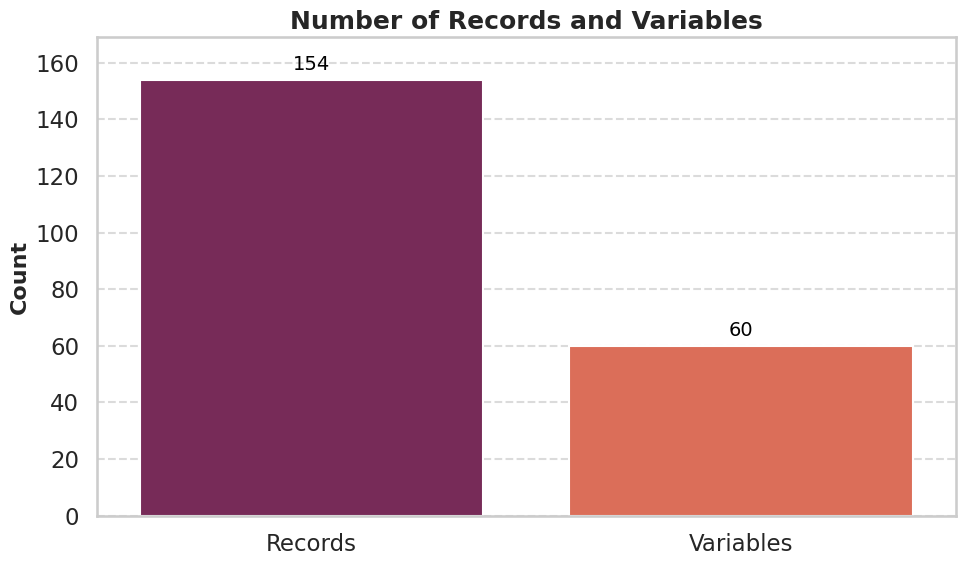

In [11]:
# Set a more visually appealing theme
sns.set_theme(style="whitegrid", context="talk")

# Create the bar plot with improved aesthetics
values = [df.shape[0], df.shape[1]]  # Number of records and variables
categories = ['Records', 'Variables']

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=categories, y=values, palette='rocket', ax=ax)

# Add labels and title with improved font sizes and weights
ax.set_ylabel('Count', fontsize=16, fontweight='bold')
ax.set_xlabel('', fontsize=14)
ax.set_title('Number of Records and Variables', fontsize=18, fontweight='bold')

# Annotate the bars with values
for i, value in enumerate(values):
    ax.text(i, value + 2, f'{value}', ha='center', va='bottom', fontsize=14, color='black')

# Set the y-axis limit to ensure the bars fit within the plot
ax.set_ylim(0, max(values) + 15)

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('data/number_of_records_and_variables.png', dpi=300, bbox_inches='tight')
plt.show()


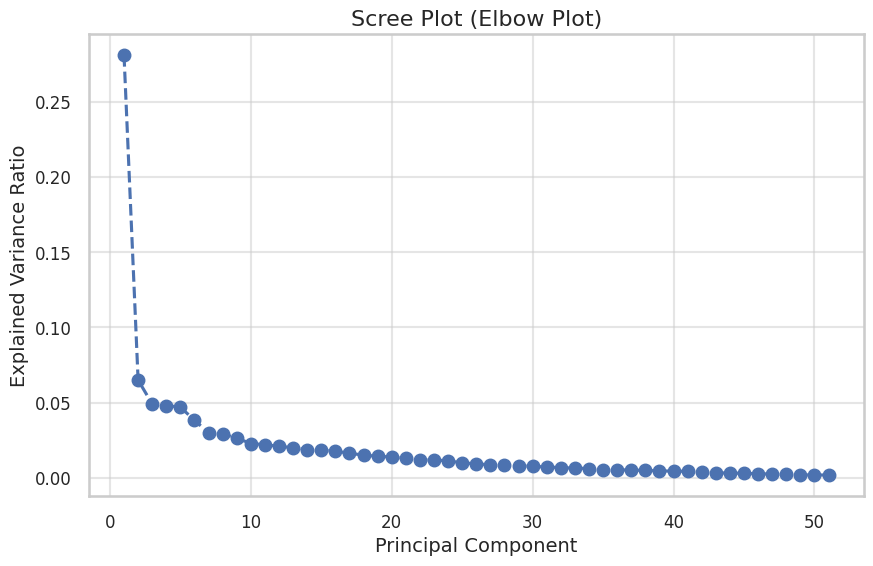

In [12]:
# Standardize the data (if not already standardized)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot (Elbow Plot)', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5)
plt.savefig('data/scree_plot.png', dpi=300, bbox_inches='tight')
plt.show()


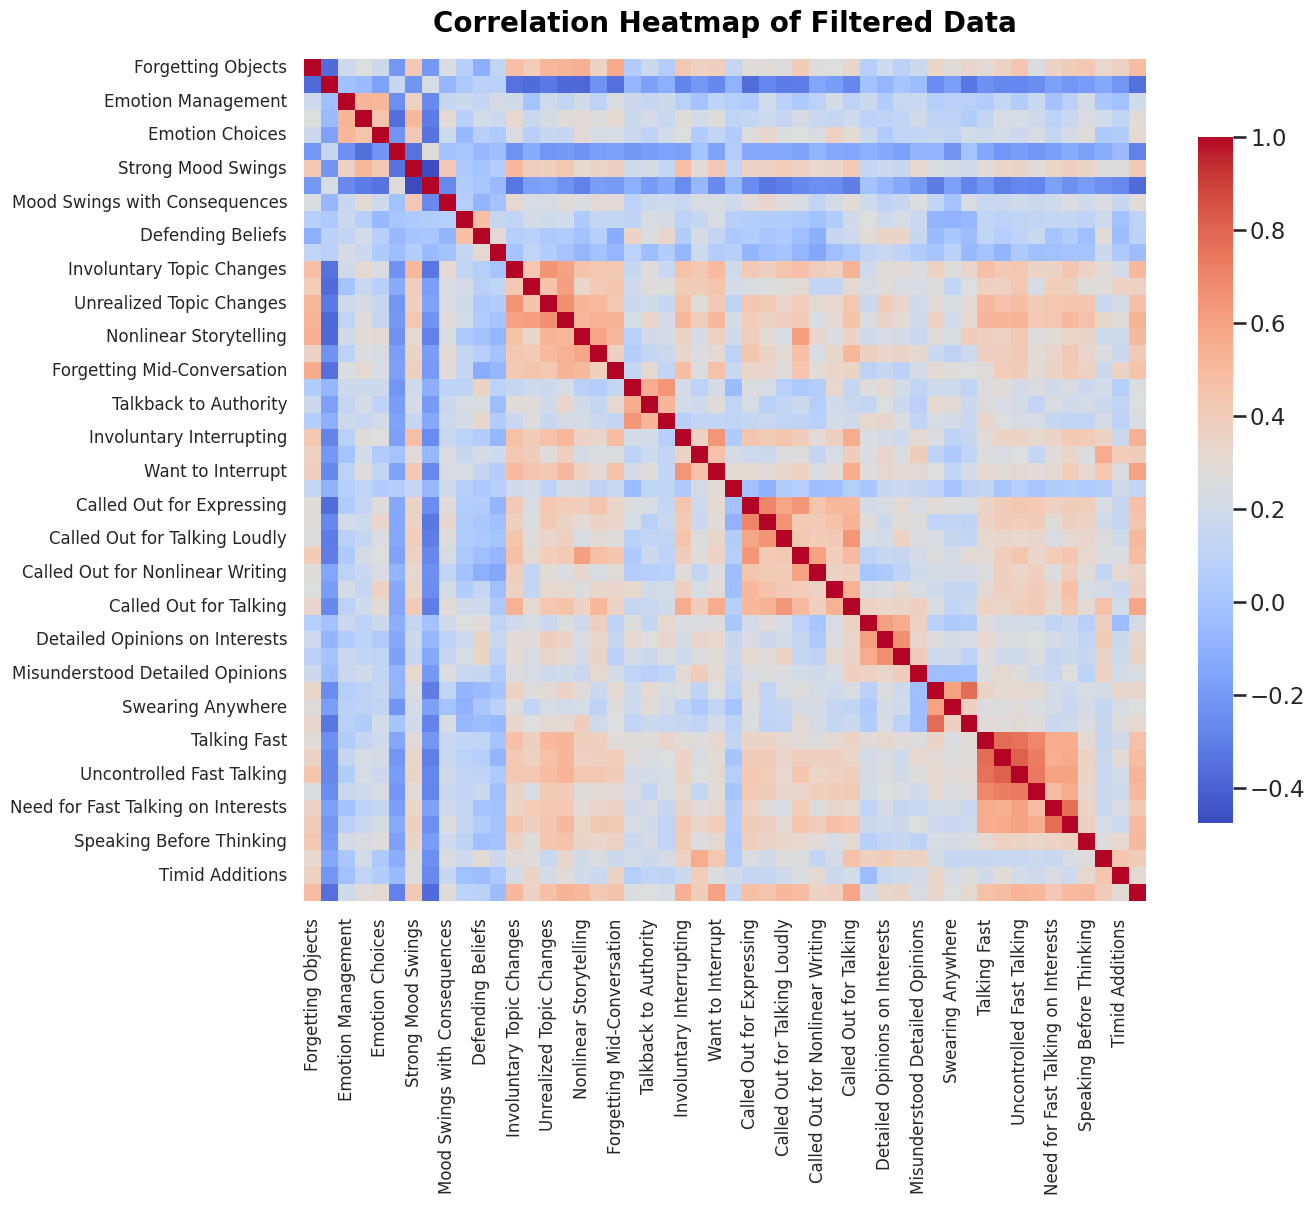

In [13]:
# Drop the specified columns
columns_to_ignore = ['sex', 'adhd_diagnosis', 'age', 'education', 'occupation', 'dialect', 
                     'special_interest', 'diary_entry', 'selfdefining_memory', 'empty_sheet']
df_filtered = df.drop(columns=columns_to_ignore)

feature_map = {
    'forgetting_objects': 'Forgetting Objects',
    'forgetting_responsabilities': 'Forgetting Responsibilities',
    'emotion_management': 'Emotion Management',
    'emotion_reactions': 'Emotion Reactions',
    'emotion_choices': 'Emotion Choices',
    'emotion_intense_reaction': 'Intense Emotional Reactions',
    'strong_mood_swings': 'Strong Mood Swings',
    'control_mood_swings': 'Control Over Mood Swings',
    'mood_swings_outside_consequence': 'Mood Swings with Consequences',
    'justice_sense': 'Sense of Justice',
    'defend_beliefs': 'Defending Beliefs',
    'express_writing': 'Expressing Through Writing',
    'topic_change_involuntary': 'Involuntary Topic Changes',
    'related_topic': 'Related Topics',
    'topic_change_unrealized': 'Unrealized Topic Changes',
    'parallel_topic': 'Parallel Topics',
    'nonlinear_storytelling': 'Nonlinear Storytelling',
    'excessive_details': 'Excessive Details',
    'forgetting_mid_conversation': 'Forgetting Mid-Conversation',
    'talkback': 'Talkback',
    'talkback_authority': 'Talkback to Authority',
    'talkback_comfortable': 'Comfortable Talkback',
    'interrupting_involuntary': 'Involuntary Interrupting',
    'excited_opinion': 'Excited Opinions',
    'want_interrupt': 'Want to Interrupt',
    'want_interrupt_control': 'Control Over Interrupting',
    'called_out_expressing': 'Called Out for Expressing',
    'called_out_exalted': 'Called Out for Being Exalted',
    'called_out_talking_loud': 'Called Out for Talking Loudly',
    'called_out_nonlinear_talk': 'Called Out for Nonlinear Talk',
    'called_out_nonlinear_write': 'Called Out for Nonlinear Writing',
    'called_out_gestures': 'Called Out for Gestures',
    'called_out_talking': 'Called Out for Talking',
    'detailed_opinions': 'Detailed Opinions',
    'detailed_opinions_interest': 'Detailed Opinions on Interests',
    'detailed_opinions_people': 'Detailed Opinions on People',
    'detailed_opinions_misunderstood': 'Misunderstood Detailed Opinions',
    'swearing': 'Swearing',
    'swearing_anywhere': 'Swearing Anywhere',
    'swearing_casual': 'Casual Swearing',
    'talk_fast': 'Talking Fast',
    'talk_fast_unrealized': 'Unrealized Fast Talking',
    'talk_fast_uncontrolled': 'Uncontrolled Fast Talking',
    'called_out_talk_fast': 'Called Out for Talking Fast',
    'need_fast_talk_interest': 'Need for Fast Talking on Interests',
    'need_fast_talk_information': 'Need for Fast Talking on Information',
    'speaking_before_thinking': 'Speaking Before Thinking',
    'something_to_add': 'Something to Add',
    'something_to_add_timid': 'Timid Additions',
    'something_to_add_impuslive': 'Impulsive Additions'
}

# Rename columns in the dataframe for better readability
df_filtered_renamed = df_filtered.rename(columns=feature_map)

# Generate the correlation heatmap with improved aesthetics
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(df_filtered_renamed.corr(), annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add a prettier title with Seaborn's title styling
plt.title('Correlation Heatmap of Filtered Data', fontsize=20, pad=20, weight='bold', color='black')

# Customize tick labels for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('data/correlation_heatmap_pretty.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_19247/1884083996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='adhd_diagnosis', x='age', palette='rocket')


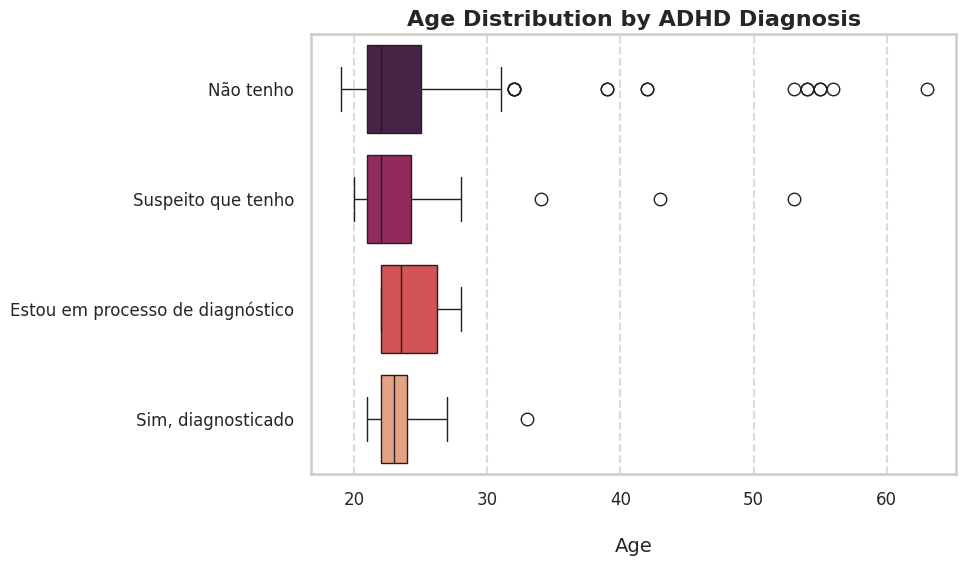

In [19]:
# Make a plot of the ages per ADHD diagnosis status with inverted axes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='adhd_diagnosis', x='age', palette='rocket')
plt.title('Age Distribution by ADHD Diagnosis', fontsize=16, fontweight='bold')
plt.ylabel('', fontsize=14, labelpad=30)  # Add padding to the y-axis label
plt.xlabel('Age', fontsize=14, labelpad=20)  # Add padding to the x-axis label
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('data/age_distribution_adhd_diagnosis.png', dpi=300, bbox_inches='tight')
plt.show()


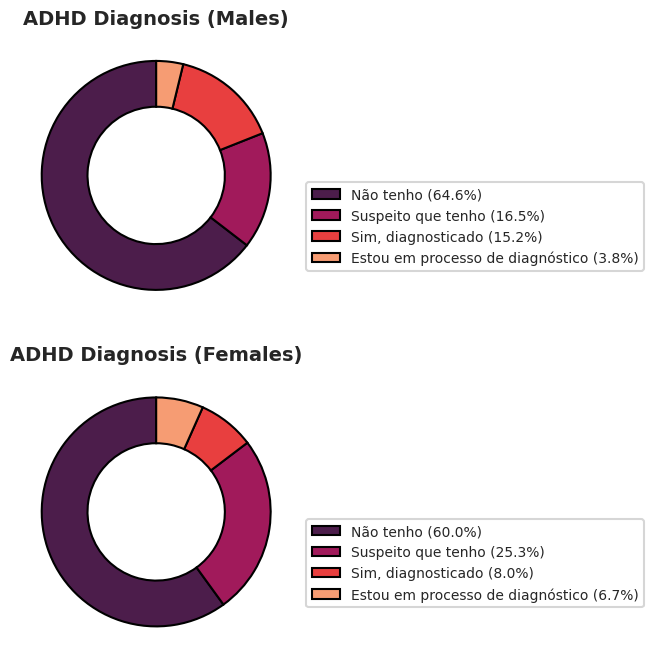

In [ ]:
# Filter data by sex
male_data = df[df['sex'] == 'Masculino']['adhd_diagnosis'].value_counts()
female_data = df[df['sex'] == 'Feminino']['adhd_diagnosis'].value_counts()

# Calculate percentages for male and female data
male_labels = [f"{label} ({count / male_data.sum() * 100:.1f}%)" for label, count in male_data.items()]
female_labels = [f"{label} ({count / female_data.sum() * 100:.1f}%)" for label, count in female_data.items()]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Donut chart for males
axes[0].pie(
    male_data,
    startangle=90,
    colors=sns.color_palette('rocket', len(male_data)),
    wedgeprops={'edgecolor': 'black', 'width': 0.4},  # Donut effect
)
axes[0].set_title('ADHD Diagnosis (Males)', fontsize=14, fontweight='bold')
axes[0].legend(labels=male_labels, loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Donut chart for females
axes[1].pie(
    female_data,
    startangle=90,
    colors=sns.color_palette('rocket', len(female_data)),
    wedgeprops={'edgecolor': 'black', 'width': 0.4},  # Donut effect
)
axes[1].set_title('ADHD Diagnosis (Females)', fontsize=14, fontweight='bold')
axes[1].legend(labels=female_labels, loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('data/adhd_diagnosis_by_sex.png', dpi=300, bbox_inches='tight')
plt.show()
